## Matrix Games
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

We are interested in the following min-max matrix game
\begin{equation}
    \min_{x \in \D_n}\max_{y\in \D_m} \lr{Ax, y},
\end{equation}
where $x\in \R^n$, $y\in \R^m$, $A\in \R^{m\times n}$, and $\Delta_m$,
$\D_n$ denote the standard unit simplices in $\R^m$ and $\R^n$
respectively.


In [1]:
import matplotlib.pyplot as plt

from opt_operators import *
from methods.algorithms import *
from methods.pd_algorithms import *
from methods.gr_pd_algorithms import *
%reload_ext autoreload
%autoreload 2

Choose any generator for random generation of data. In the paper we set gen = 100

In [26]:
gen = 50

Define matrix $A\in \R^{m\times n}$ (choose one of two possible examples below or generate a new instance):

In [27]:
m = 100
n = 100
np.random.seed(gen)
A = np.random.uniform(-1, 1, [m,n])

In [33]:
m = 100
n = 100
np.random.seed(gen)
A = np.random.normal(0, 1, [m, n])

In [57]:
m = 200
n = 100
np.random.seed(gen)
A = np.random.normal(0, 10, [m,n])

In [45]:
m = 100
n = 200
np.random.seed(gen)
A = np.random.uniform(0, 1, [m, n])

Define the starting points $x^0$ and $y^0$

In [58]:
x0 = np.ones(n)/n
y0 = np.ones(m)/m
z0 = np.hstack((x0, y0))

Define all proximal operators, primal-dual gap, etc.

In [59]:
# define general proximal operator. Note that it is independent of 
# the dimension, so we will use it for both primal and dual variables
def prox_g(x, rho):
    return proj_simplex(x)

# define primal-dual gap
def J_gap(x,y):
    return max(A.dot(x)) - min(A.T.dot(y))


### For variational inequalities formulation (Tseng FBF method and PEGM)

def F(z):
    u1 = A.T.dot(z[n:])
    u2 = -A.dot(z[:n])
    return np.hstack((u1, u2))

def prox_G(z, rho):
    u1 = proj_simplex(z[:n])
    u2 = proj_simplex(z[n:])
    return np.hstack((u1, u2))

def J_vip(z):
    return J_gap(z[:n], z[n:])

Compute the matrix norm of operator $A$

Define stepsizes for primal-dual method. 

In [60]:
# step size for PDA and GRPDA
L = np.sqrt(np.max(LA.eigh(A.dot(A.T))[0]))
tau = 1./L
sigma = 1./L
phi = 1.618
sqrt_phi = np.sqrt(phi)

la_gr = 1.618/2 * 1./L

print(L)

237.7882543032867


In [61]:
N = 300000
phi = 1.3; s_p = np.sqrt(phi*(2*phi+2-phi**2)/(1+phi));print(s_p)
ans1 = pd_Golden(J_gap, prox_g, prox_g, A, x0, y0, sigma*s_p, tau*s_p,phi, numb_iter=N)
phi = 1.6;s_p = np.sqrt(phi*(2*phi+2-phi**2)/(1+phi));print(s_p)
ans2 = pd_Golden(J_gap, prox_g, prox_g, A, x0, y0, sigma*s_p, tau*s_p,phi, numb_iter=N)
phi = 2; s_p = np.sqrt(phi*(2*phi+2-phi**2)/(1+phi));print(s_p)
ans3 = pd_Golden(J_gap, prox_g, prox_g, A, x0, y0, sigma*s_p, tau*s_p,phi, numb_iter=N)
phi = 2.3; s_p = np.sqrt(phi*(2*phi+2-phi**2)/(1+phi));print(s_p)
ans4 = pd_Golden(J_gap, prox_g, prox_g, A, x0, y0, sigma*s_p, tau*s_p,phi, numb_iter=N)

1.2824907830840937
----- Golden-Ratio PDA-----
Time execution: 47.58
1.2746040109051062
----- Golden-Ratio PDA-----
Time execution: 50.71
1.1547005383792515
----- Golden-Ratio PDA-----
Time execution: 50.5
0.9555261917029294
----- Golden-Ratio PDA-----
Time execution: 51.05


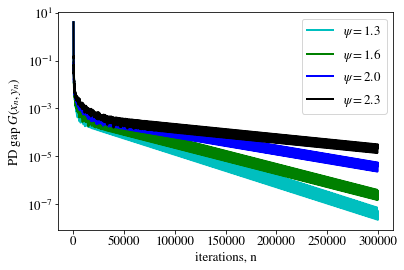

In [62]:
import matplotlib as mpl
mpl.rc('lines', linewidth=2)
mpl.rcParams.update(
    {'font.size': 13, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2

plt.plot(ans1[0], 'c',label = '$\psi=1.3$')
plt.plot(ans2[0], 'g', label = '$\psi=1.6$')
plt.plot(ans3[0], 'b',label = '$\psi=2.0$')
plt.plot(ans4[0], 'k',label = '$\psi=2.3$')


plt.yscale('log')
#plt.xscale('log')
plt.xlabel(u'iterations, n')
plt.ylabel(u'PD gap $G(x_n,y_n)$')
#plt.axis([-1000,20000, 1e-16,1e+4])
plt.legend()
plt.savefig('figures/MG-psi-3.pdf')
plt.show()